## Introduction

For schools with CS, do any attributes of the individual student contribute to whether or not they take CS? And enrollment rate in the school (look closer at logistic regression for this question)?

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression

In [4]:
original_ospi = pd.read_csv('2022_school_pt5.csv',  index_col=0)

In [5]:
ospi_data = pd.read_csv('2022_school_pt5.csv',  index_col=0)

In [6]:
ospi_data.head()

,DistrictCode,SchoolCode,SchoolName,Longitude,Latitude,County,AllStudents,C_AllStudents,G_Female,GC_Female,...,D_NoDisability,DC_NoDisability,A_9,AC_9,A_10,AC_10,A_11,AC_11,A_12,AC_12
0,1109,3075,Washtucna Elementary/High School,-118.311231,46.752189,Adams,28,3,9,0,...,26,3,7,0,4,0,6,1,11,2
1,1147,3015,Othello High School,-119.165246,46.822710,Adams,1281,169,635,60,...,1086,140,382,51,328,44,321,29,250,45
2,1158,2903,Lind-Ritzville High School,-118.292516,47.125588,Adams,60,17,30,8,...,57,16,18,9,15,2,14,1,13,5
3,1160,2132,Ritzville High School,-118.292516,47.125588,Adams,113,18,57,9,...,107,14,32,5,35,3,25,3,21,7
4,2250,1617,Educational Opportunity Center,-117.057521,46.411019,Asotin,167,0,89,0,...,142,0,16,0,51,0,41,0,59,0


In [7]:
def low_inc_perc(row):
    return row['I_LowIncome'] / row['AllStudents']

ospi_data['PercentLowIncome'] = ospi_data.apply(low_inc_perc, axis=1)

In [8]:
ospi_data.head()

,DistrictCode,SchoolCode,SchoolName,Longitude,Latitude,County,AllStudents,C_AllStudents,G_Female,GC_Female,...,DC_NoDisability,A_9,AC_9,A_10,AC_10,A_11,AC_11,A_12,AC_12,PercentLowIncome
0,1109,3075,Washtucna Elementary/High School,-118.311231,46.752189,Adams,28,3,9,0,...,3,7,0,4,0,6,1,11,2,0.607143
1,1147,3015,Othello High School,-119.165246,46.822710,Adams,1281,169,635,60,...,140,382,51,328,44,321,29,250,45,0.834504
2,1158,2903,Lind-Ritzville High School,-118.292516,47.125588,Adams,60,17,30,8,...,16,18,9,15,2,14,1,13,5,0.800000
3,1160,2132,Ritzville High School,-118.292516,47.125588,Adams,113,18,57,9,...,14,32,5,35,3,25,3,21,7,0.415929
4,2250,1617,Educational Opportunity Center,-117.057521,46.411019,Asotin,167,0,89,0,...,0,16,0,51,0,41,0,59,0,0.796407


In [9]:
pd.set_option('display.max_columns', None)
ospi_data.head()

,DistrictCode,SchoolCode,SchoolName,Longitude,Latitude,County,AllStudents,C_AllStudents,G_Female,GC_Female,G_Male,GC_Male,G_GenderX,GC_GenderX,R_Native,RC_Native,R_Asian,RC_Asian,R_Black,RC_Black,R_Hisp_Lat,RC_Hisp_Lat,R_HPI,RC_HPI,R_NA,RC_NA,R_TwoOrMore,RC_TwoOrMore,R_White,RC_White,L_ELL,LC_ELL,L_NoELL,LC_NoELL,I_LowIncome,IC_LowIncome,I_NoLowIncome,IC_NoLowIncome,D_Disability,DC_Disability,D_NoDisability,DC_NoDisability,A_9,AC_9,A_10,AC_10,A_11,AC_11,A_12,AC_12,PercentLowIncome
0,1109,3075,Washtucna Elementary/High School,-118.311231,46.752189,Adams,28,3,9,0,19,3,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,24,3,0,0,28,3,17,1,11,2,2,0,26,3,7,0,4,0,6,1,11,2,0.607143
1,1147,3015,Othello High School,-119.165246,46.822710,Adams,1281,169,635,60,646,109,0,0,0,0,5,1,2,0,1173,151,0,0,0,0,3,0,98,17,402,54,879,115,1069,142,212,27,195,29,1086,140,382,51,328,44,321,29,250,45,0.834504
2,1158,2903,Lind-Ritzville High School,-118.292516,47.125588,Adams,60,17,30,8,29,9,1,0,0,0,0,0,1,0,23,10,0,0,0,0,4,2,32,5,7,3,53,14,48,14,12,3,3,1,57,16,18,9,15,2,14,1,13,5,0.800000
3,1160,2132,Ritzville High School,-118.292516,47.125588,Adams,113,18,57,9,56,9,0,0,2,2,2,0,0,0,9,0,0,0,0,0,3,0,97,16,0,0,113,18,47,6,66,12,6,4,107,14,32,5,35,3,25,3,21,7,0.415929
4,2250,1617,Educational Opportunity Center,-117.057521,46.411019,Asotin,167,0,89,0,78,0,0,0,1,0,0,0,2,0,11,0,0,0,0,0,5,0,148,0,0,0,167,0,133,0,34,0,25,0,142,0,16,0,51,0,41,0,59,0,0.796407


For the following, note that BIPOC does not include Asian in this calculation. The following calculation includes all reported racial identities except for Asian and white.

In [10]:
def number_bipoc(row):
    return (row['R_Native'] + row['R_Black'] + row['R_Hisp_Lat'] + row['R_HPI'] + row['R_TwoOrMore'])

ospi_data['R_BIPOC'] = ospi_data.apply(number_bipoc, axis=1)

In [11]:
def bipoc_perc(row):
    return (row['R_BIPOC']) / row['AllStudents']

ospi_data['PercentBIPOC'] = ospi_data.apply(bipoc_perc, axis=1)

In [12]:
ospi_data['DistrictNumSchools'] = ospi_data.groupby('DistrictCode')['SchoolCode'].transform('size')
ospi_data['DistrictSize'] = ospi_data.groupby('DistrictCode')['AllStudents'].transform('sum')
ospi_data['DistrictLowIncome'] = ospi_data.groupby('DistrictCode')['I_LowIncome'].transform('sum')
ospi_data['DistrictPctLowIncome'] = ospi_data['DistrictLowIncome']/ospi_data['DistrictSize']
ospi_data['DistrictBIPOC'] = ospi_data.groupby('DistrictCode')['R_BIPOC'].transform('sum')
ospi_data['DistrictPctBIPOC'] = ospi_data['DistrictBIPOC']/ospi_data['DistrictSize']

## Preprocessing: Hot One Encoding
*Hot one encoding whether or not a school offers CS*  

In [13]:
# reduced_ospi = reduced_ospi.copy()
ospi_data['CS_Offered'] = np.where(ospi_data['C_AllStudents'] == 0, 0, 1)
ospi_data.head()

,DistrictCode,SchoolCode,SchoolName,Longitude,Latitude,County,AllStudents,C_AllStudents,G_Female,GC_Female,G_Male,GC_Male,G_GenderX,GC_GenderX,R_Native,RC_Native,R_Asian,RC_Asian,R_Black,RC_Black,R_Hisp_Lat,RC_Hisp_Lat,R_HPI,RC_HPI,R_NA,RC_NA,R_TwoOrMore,RC_TwoOrMore,R_White,RC_White,L_ELL,LC_ELL,L_NoELL,LC_NoELL,I_LowIncome,IC_LowIncome,I_NoLowIncome,IC_NoLowIncome,D_Disability,DC_Disability,D_NoDisability,DC_NoDisability,A_9,AC_9,A_10,AC_10,A_11,AC_11,A_12,AC_12,PercentLowIncome,R_BIPOC,PercentBIPOC,DistrictNumSchools,DistrictSize,DistrictLowIncome,DistrictPctLowIncome,DistrictBIPOC,DistrictPctBIPOC,CS_Offered
0,1109,3075,Washtucna Elementary/High School,-118.311231,46.752189,Adams,28,3,9,0,19,3,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,24,3,0,0,28,3,17,1,11,2,2,0,26,3,7,0,4,0,6,1,11,2,0.607143,4,0.142857,1,28,17,0.607143,4,0.142857,1
1,1147,3015,Othello High School,-119.165246,46.822710,Adams,1281,169,635,60,646,109,0,0,0,0,5,1,2,0,1173,151,0,0,0,0,3,0,98,17,402,54,879,115,1069,142,212,27,195,29,1086,140,382,51,328,44,321,29,250,45,0.834504,1178,0.919594,3,1464,1235,0.843579,1346,0.919399,1
2,1158,2903,Lind-Ritzville High School,-118.292516,47.125588,Adams,60,17,30,8,29,9,1,0,0,0,0,0,1,0,23,10,0,0,0,0,4,2,32,5,7,3,53,14,48,14,12,3,3,1,57,16,18,9,15,2,14,1,13,5,0.800000,28,0.466667,1,60,48,0.800000,28,0.466667,1
3,1160,2132,Ritzville High School,-118.292516,47.125588,Adams,113,18,57,9,56,9,0,0,2,2,2,0,0,0,9,0,0,0,0,0,3,0,97,16,0,0,113,18,47,6,66,12,6,4,107,14,32,5,35,3,25,3,21,7,0.415929,14,0.123894,1,113,47,0.415929,14,0.123894,1
4,2250,1617,Educational Opportunity Center,-117.057521,46.411019,Asotin,167,0,89,0,78,0,0,0,1,0,0,0,2,0,11,0,0,0,0,0,5,0,148,0,0,0,167,0,133,0,34,0,25,0,142,0,16,0,51,0,41,0,59,0,0.796407,19,0.113772,4,1034,559,0.540619,192,0.185687,0


## Preprocessing: Percentage of District with CS

In [14]:
ospi_data['DistrictCS'] = ospi_data.groupby('DistrictCode')['CS_Offered'].transform('sum')
ospi_data['DistrictPctCS'] = ospi_data['DistrictCS']/ospi_data['DistrictNumSchools']
ospi_data.head(25)

,DistrictCode,SchoolCode,SchoolName,Longitude,Latitude,County,AllStudents,C_AllStudents,G_Female,GC_Female,G_Male,GC_Male,G_GenderX,GC_GenderX,R_Native,RC_Native,R_Asian,RC_Asian,R_Black,RC_Black,R_Hisp_Lat,RC_Hisp_Lat,R_HPI,RC_HPI,R_NA,RC_NA,R_TwoOrMore,RC_TwoOrMore,R_White,RC_White,L_ELL,LC_ELL,L_NoELL,LC_NoELL,I_LowIncome,IC_LowIncome,I_NoLowIncome,IC_NoLowIncome,D_Disability,DC_Disability,D_NoDisability,DC_NoDisability,A_9,AC_9,A_10,AC_10,A_11,AC_11,A_12,AC_12,PercentLowIncome,R_BIPOC,PercentBIPOC,DistrictNumSchools,DistrictSize,DistrictLowIncome,DistrictPctLowIncome,DistrictBIPOC,DistrictPctBIPOC,CS_Offered,DistrictCS,DistrictPctCS
0,1109,3075,Washtucna Elementary/High School,-118.311231,46.752189,Adams,28,3,9,0,19,3,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,24,3,0,0,28,3,17,1,11,2,2,0,26,3,7,0,4,0,6,1,11,2,0.607143,4,0.142857,1,28,17,0.607143,4,0.142857,1,1,1.000000
1,1147,3015,Othello High School,-119.165246,46.822710,Adams,1281,169,635,60,646,109,0,0,0,0,5,1,2,0,1173,151,0,0,0,0,3,0,98,17,402,54,879,115,1069,142,212,27,195,29,1086,140,382,51,328,44,321,29,250,45,0.834504,1178,0.919594,3,1464,1235,0.843579,1346,0.919399,1,1,0.333333
2,1158,2903,Lind-Ritzville High School,-118.292516,47.125588,Adams,60,17,30,8,29,9,1,0,0,0,0,0,1,0,23,10,0,0,0,0,4,2,32,5,7,3,53,14,48,14,12,3,3,1,57,16,18,9,15,2,14,1,13,5,0.800000,28,0.466667,1,60,48,0.800000,28,0.466667,1,1,1.000000
3,1160,2132,Ritzville High School,-118.292516,47.125588,Adams,113,18,57,9,56,9,0,0,2,2,2,0,0,0,9,0,0,0,0,0,3,0,97,16,0,0,113,18,47,6,66,12,6,4,107,14,32,5,35,3,25,3,21,7,0.415929,14,0.123894,1,113,47,0.415929,14,0.123894,1,1,1.000000
4,2250,1617,Educational Opportunity Center,-117.057521,46.411019,Asotin,167,0,89,0,78,0,0,0,1,0,0,0,2,0,11,0,0,0,0,0,5,0,148,0,0,0,167,0,133,0,34,0,25,0,142,0,16,0,51,0,41,0,59,0,0.796407,19,0.113772,4,1034,559,0.540619,192,0.185687,0,2,0.500000
5,2250,2299,Charles Francis Adams High School,-117.044772,46.410724,Asotin,803,29,389,10,413,19,1,0,19,0,9,0,14,0,74,2,0,0,0,0,56,4,631,23,4,0,799,29,389,11,414,18,117,1,686,28,220,13,218,12,179,3,186,1,0.484433,163,0.202989,4,1034,559,0.540619,192,0.185687,1,2,0.500000
6,2420,2434,Asotin Jr Sr High,-117.048210,46.339330,Asotin,177,0,88,0,89,0,0,0,0,0,2,0,1,0,9,0,1,0,0,0,15,0,149,0,0,0,177,0,62,0,115,0,21,0,156,0,37,0,36,0,52,0,52,0,0.350282,26,0.146893,1,177,62,0.350282,26,0.146893,0,0,0.000000
7,3017,1884,Legacy High School,-119.184062,46.199694,Benton,716,0,370,0,345,0,1,0,4,0,2,0,15,0,316,0,4,0,0,0,52,0,323,0,56,0,660,0,334,0,382,0,63,0,653,0,118,0,150,0,187,0,261,0,0.466480,391,0.546089,8,7166,3615,0.504466,3355,0.468183,0,4,0.500000
8,3017,2826,Kennewick High School,-119.126476,46.206332,Benton,1911,203,942,47,967,156,2,0,4,1,51,4,34,4,974,95,12,2,0,0,77,8,759,89,322,23,1589,180,1249,127,662,76,214,18,1697,185,569,54,491,70,410,31,441,48,0.653585,1101,0.576138,8,7166,3615,0.504466,3355,0.468183,1,4,0.500000
9,3017,3731,Kamiakin High School,-119.187120,46.216464,Benton,2007,139,969,27,1035,112,3,0,14,0,32,4,49,2,602,28,2,2,0,0,103,11,1205,92,140,10,1867,129,792,50,1215,89,247,26,1760,113,566,30,527,53,489,32,425,24,0.394619,770,0.383657,8,7166,3615,0.504466,3355,0.468183,1,4,0.500000


## Preprocessing: Excluding schools without CS

In [15]:
only_cs = ospi_data[ospi_data['CS_Offered'] == 1].copy(deep=True)
only_cs.head()

,DistrictCode,SchoolCode,SchoolName,Longitude,Latitude,County,AllStudents,C_AllStudents,G_Female,GC_Female,G_Male,GC_Male,G_GenderX,GC_GenderX,R_Native,RC_Native,R_Asian,RC_Asian,R_Black,RC_Black,R_Hisp_Lat,RC_Hisp_Lat,R_HPI,RC_HPI,R_NA,RC_NA,R_TwoOrMore,RC_TwoOrMore,R_White,RC_White,L_ELL,LC_ELL,L_NoELL,LC_NoELL,I_LowIncome,IC_LowIncome,I_NoLowIncome,IC_NoLowIncome,D_Disability,DC_Disability,D_NoDisability,DC_NoDisability,A_9,AC_9,A_10,AC_10,A_11,AC_11,A_12,AC_12,PercentLowIncome,R_BIPOC,PercentBIPOC,DistrictNumSchools,DistrictSize,DistrictLowIncome,DistrictPctLowIncome,DistrictBIPOC,DistrictPctBIPOC,CS_Offered,DistrictCS,DistrictPctCS
0,1109,3075,Washtucna Elementary/High School,-118.311231,46.752189,Adams,28,3,9,0,19,3,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,24,3,0,0,28,3,17,1,11,2,2,0,26,3,7,0,4,0,6,1,11,2,0.607143,4,0.142857,1,28,17,0.607143,4,0.142857,1,1,1.000000
1,1147,3015,Othello High School,-119.165246,46.822710,Adams,1281,169,635,60,646,109,0,0,0,0,5,1,2,0,1173,151,0,0,0,0,3,0,98,17,402,54,879,115,1069,142,212,27,195,29,1086,140,382,51,328,44,321,29,250,45,0.834504,1178,0.919594,3,1464,1235,0.843579,1346,0.919399,1,1,0.333333
2,1158,2903,Lind-Ritzville High School,-118.292516,47.125588,Adams,60,17,30,8,29,9,1,0,0,0,0,0,1,0,23,10,0,0,0,0,4,2,32,5,7,3,53,14,48,14,12,3,3,1,57,16,18,9,15,2,14,1,13,5,0.800000,28,0.466667,1,60,48,0.800000,28,0.466667,1,1,1.000000
3,1160,2132,Ritzville High School,-118.292516,47.125588,Adams,113,18,57,9,56,9,0,0,2,2,2,0,0,0,9,0,0,0,0,0,3,0,97,16,0,0,113,18,47,6,66,12,6,4,107,14,32,5,35,3,25,3,21,7,0.415929,14,0.123894,1,113,47,0.415929,14,0.123894,1,1,1.000000
5,2250,2299,Charles Francis Adams High School,-117.044772,46.410724,Asotin,803,29,389,10,413,19,1,0,19,0,9,0,14,0,74,2,0,0,0,0,56,4,631,23,4,0,799,29,389,11,414,18,117,1,686,28,220,13,218,12,179,3,186,1,0.484433,163,0.202989,4,1034,559,0.540619,192,0.185687,1,2,0.500000


## Preprocessing: Generating synthetic student records
*Using probabilities found in the dataset*

In [16]:
synth_school = only_cs.copy(deep=True)

In [17]:
# Calculating probabilities for each school

# Male

def calc_male_prob(row):
    return row['G_Male'] / row['AllStudents']

synth_school['G_Male_Prob'] = synth_school.apply(calc_male_prob, axis=1)


# Native

def calc_native_prob(row):
    return row['R_Native'] / row['AllStudents']

synth_school['R_Native_Prob'] = synth_school.apply(calc_native_prob, axis=1)

# Asian

def calc_asian_prob(row):
    return row['R_Asian'] / row['AllStudents']

synth_school['R_Asian_Prob'] = synth_school.apply(calc_asian_prob, axis=1)

# Black

def calc_black_prob(row):
    return row['R_Black'] / row['AllStudents']

synth_school['R_Black_Prob'] = synth_school.apply(calc_black_prob, axis=1)

# Hisp_Lat

def calc_hisp_lat_prob(row):
    return row['R_Hisp_Lat'] / row['AllStudents']

synth_school['R_Hisp_Lat_Prob'] = synth_school.apply(calc_hisp_lat_prob, axis=1)

# HPI

def calc_hpi_prob(row):
    return row['R_HPI'] / row['AllStudents']

synth_school['R_HPI_Prob'] = synth_school.apply(calc_hpi_prob, axis=1)

# R_NA

def calc_na_prob(row):
    return row['R_NA'] / row['AllStudents']

synth_school['R_NA_Prob'] = synth_school.apply(calc_na_prob, axis=1)

# R_TwoOrMore

def calc_twoormore_prob(row):
    return row['R_TwoOrMore'] / row['AllStudents']

synth_school['R_TwoOrMore_Prob'] = synth_school.apply(calc_twoormore_prob, axis=1)

# White

def calc_white_prob(row):
    return row['R_White'] / row['AllStudents']

synth_school['R_White_Prob'] = synth_school.apply(calc_white_prob, axis=1)

# ELL

def calc_ell_prob(row):
    return row['L_ELL'] / row['AllStudents']

synth_school['L_ELL_Prob'] = synth_school.apply(calc_ell_prob, axis=1)

# No ELL

def calc_noell_prob(row):
    return row['L_NoELL'] / row['AllStudents']

synth_school['L_NoELL_Prob'] = synth_school.apply(calc_noell_prob, axis=1)

# Low Income

def calc_lowincome_prob(row):
    return row['I_LowIncome'] / row['AllStudents']

synth_school['I_LowIncome_Prob'] = synth_school.apply(calc_lowincome_prob, axis=1)

# No Low Income

def calc_nolow_prob(row):
    return row['I_NoLowIncome'] / row['AllStudents']

synth_school['I_NoLowIncome_Prob'] = synth_school.apply(calc_nolow_prob, axis=1)

# Disability

def calc_disability_prob(row):
    return row['D_Disability'] / row['AllStudents']

synth_school['D_Disability_Prob'] = synth_school.apply(calc_disability_prob, axis=1)

# No Disability

def calc_nodisability_prob(row):
    return row['D_NoDisability'] / row['AllStudents']

synth_school['D_NoDisability_Prob'] = synth_school.apply(calc_nodisability_prob, axis=1)

# Grade 9

def calc_a9_prob(row):
    return row['A_9'] / row['AllStudents']

synth_school['A_9_Prob'] = synth_school.apply(calc_a9_prob, axis=1)

# Grade 10

def calc_a10_prob(row):
    return row['A_10'] / row['AllStudents']

synth_school['A_10_Prob'] = synth_school.apply(calc_a10_prob, axis=1)

# Grade 11

def calc_a11_prob(row):
    return row['A_11'] / row['AllStudents']

synth_school['A_11_Prob'] = synth_school.apply(calc_a11_prob, axis=1)

# Grade 12

def calc_a12_prob(row):
    return row['A_12'] / row['AllStudents']

synth_school['A_12_Prob'] = synth_school.apply(calc_a12_prob, axis=1)

In [18]:
# Calculating CS probabilities for each school

def calc_fem_or_x_cs_prob(row):
    if (row['G_Female'] + row['G_GenderX']) == 0:
        return 0
    else:
        return (row['GC_Female'] + row['GC_GenderX']) / (row['G_Female'] + row['G_GenderX'])

synth_school['GC_Female_or_X_Prob'] = synth_school.apply(calc_fem_or_x_cs_prob, axis=1)

# Male

def calc_male_cs_prob(row):
    return row['GC_Male'] / row['G_Male']

synth_school['GC_Male_Prob'] = synth_school.apply(calc_male_cs_prob, axis=1)

# Native

def calc_native_cs_prob(row):
    if row['R_Native'] == 0:
        return 0
    else:
        return row['RC_Native'] / row['R_Native']

synth_school['RC_Native_Prob'] = synth_school.apply(calc_native_cs_prob, axis=1)

# Asian

def calc_asian_cs_prob(row):
    if row['R_Asian'] == 0:
        return 0
    else:
        return row['RC_Asian'] / row['R_Asian']

synth_school['RC_Asian_Prob'] = synth_school.apply(calc_asian_cs_prob, axis=1)

# Black

def calc_black_cs_prob(row):
    if row['R_Black'] == 0:
        return 0
    else:
        return row['RC_Black'] / row['R_Black']

synth_school['RC_Black_Prob'] = synth_school.apply(calc_black_cs_prob, axis=1)

# Hisp_Lat

def calc_hisp_lat_cs_prob(row):
    if row['R_Hisp_Lat'] == 0:
        return 0
    else:
        return row['RC_Hisp_Lat'] / row['R_Hisp_Lat']

synth_school['RC_Hisp_Lat_Prob'] = synth_school.apply(calc_hisp_lat_cs_prob, axis=1)

# HPI

def calc_hpi_cs_prob(row):
    if row['R_HPI'] == 0:
        return 0
    else:
        return row['RC_HPI'] / row['R_HPI']

synth_school['RC_HPI_Prob'] = synth_school.apply(calc_hpi_cs_prob, axis=1)

# RC_NA

def calc_na_cs_prob(row):
    if row['R_NA'] == 0:
        return 0
    else:
        return row['RC_NA'] / row['R_NA']

synth_school['RC_NA_Prob'] = synth_school.apply(calc_na_cs_prob, axis=1)

# RC_TwoOrMore

def calc_twoormore_cs_prob(row):
    if row['R_TwoOrMore'] == 0:
        return 0
    else:
        return row['RC_TwoOrMore'] / row['R_TwoOrMore']

synth_school['RC_TwoOrMore_Prob'] = synth_school.apply(calc_twoormore_cs_prob, axis=1)

# White

def calc_white_cs_prob(row):
    return row['RC_White'] / row['R_White']

synth_school['RC_White_Prob'] = synth_school.apply(calc_white_cs_prob, axis=1)

# ELL

def calc_ell_cs_prob(row):
    if row['L_ELL'] == 0:
        return 0
    else:
        return row['LC_ELL'] / row['L_ELL']

synth_school['LC_ELL_Prob'] = synth_school.apply(calc_ell_cs_prob, axis=1)

# No ELL

def calc_noell_cs_prob(row):
    return row['LC_NoELL'] / row['L_NoELL']

synth_school['LC_NoELL_Prob'] = synth_school.apply(calc_noell_cs_prob, axis=1)

# Low Income

def calc_lowincome_cs_prob(row):
    if row['I_LowIncome'] == 0:
        return 0
    else:
        return row['IC_LowIncome'] / row['I_LowIncome']

synth_school['IC_LowIncome_Prob'] = synth_school.apply(calc_lowincome_cs_prob, axis=1)

# No Low Income

def calc_nolow_cs_prob(row):
    if row['I_NoLowIncome'] == 0:
        return 0
    else:
        return row['IC_NoLowIncome'] / row['I_NoLowIncome']

synth_school['IC_NoLowIncome_Prob'] = synth_school.apply(calc_nolow_cs_prob, axis=1)

# Disability

def calc_disability_cs_prob(row):
    if row['D_Disability'] == 0:
        return 0
    else:
        return row['DC_Disability'] / row['D_Disability']

synth_school['DC_Disability_Prob'] = synth_school.apply(calc_disability_cs_prob, axis=1)

# No Disability

def calc_nodisability_cs_prob(row):
    if row['D_NoDisability'] == 0:
        return 0
    else:
        return row['DC_NoDisability'] / row['D_NoDisability']

synth_school['DC_NoDisability_Prob'] = synth_school.apply(calc_nodisability_cs_prob, axis=1)

# Grade 9

def calc_a9_cs_prob(row):
    if row['A_9'] == 0:
        return 0
    else:
        return row['AC_9'] / row['A_9']

synth_school['AC_9_Prob'] = synth_school.apply(calc_a9_cs_prob, axis=1)

# Grade 10

def calc_a10_cs_prob(row):
    if row['A_10'] == 0:
        return 0
    else:
        return row['AC_10'] / row['A_10']

synth_school['AC_10_Prob'] = synth_school.apply(calc_a10_cs_prob, axis=1)

# Grade 11

def calc_a11_cs_prob(row):
    if row['A_11'] == 0:
        return 0
    else:
        return row['AC_11'] / row['A_11']

synth_school['AC_11_Prob'] = synth_school.apply(calc_a11_cs_prob, axis=1)

# Grade 12

def calc_a12_cs_prob(row):
    if row['A_12'] == 0:
        return 0
    else:
        return row['AC_12'] / row['A_12']

synth_school['AC_12_Prob'] = synth_school.apply(calc_a12_cs_prob, axis=1)


In [19]:
def calc_all_cs_cs_prob(row):
    return row['C_AllStudents'] / row['AllStudents']

synth_school['C_AllStudents_Prob'] = synth_school.apply(calc_all_cs_cs_prob, axis=1)

In [20]:
synth_students = synth_school.loc[synth_school.index.repeat(synth_school.AllStudents)].copy(deep=True)

In [21]:
rng2 = np.random.default_rng(seed=2024)


def student_gender(row):

    g_probs = np.array([row['G_Male_Prob'], 1-row['G_Male_Prob']])
    
    g_probs /= np.sum(g_probs)
    
    return rng2.choice([1, 0], size = 1, p = g_probs)
    
synth_students['Male'] = synth_students.apply(student_gender, axis=1)

In [22]:
def student_race(row):
    # TODO: Take out TwoOrMore from BIPOC definition
    
    r_probs = np.array([row['R_Native_Prob'], row['R_Asian_Prob'], 
                        row['R_Black_Prob'], row['R_Hisp_Lat_Prob'], 
                        row['R_HPI_Prob'], row['R_NA_Prob'], 
                        row['R_TwoOrMore_Prob'], row['R_White_Prob']], dtype=float)
    r_probs /= np.sum(r_probs)
    
    return rng2.choice(['Native', 'Asian', 'Black', 'Hisp_Lat', 'HPI', 'NA', 'TwoOrMore', 'White'], size = 1, p = r_probs)

synth_students['race'] = synth_students.apply(student_race, axis=1)

In [23]:
def student_ell(row):
    
    e_probs = np.array([row['L_ELL_Prob'], row['L_NoELL_Prob']], dtype=float)
    
    e_probs /= np.sum(e_probs)
    
    return rng2.choice([1, 0], size = 1, p = e_probs)

synth_students['ELL'] = synth_students.apply(student_ell, axis=1)

In [24]:
def student_low_income(row):
    
    i_probs = np.array([row['I_LowIncome_Prob'], row['I_NoLowIncome_Prob']], dtype=float)
    
    i_probs /= np.sum(i_probs)
    
    return rng2.choice([1, 0], size = 1, p = i_probs)

synth_students['LowIncome'] = synth_students.apply(student_low_income, axis=1)

In [25]:
def student_disability(row):
    
    d_probs = np.array([row['D_Disability_Prob'], row['D_NoDisability_Prob']], dtype=float)
    
    d_probs /= np.sum(d_probs)
    
    return rng2.choice([1, 0], size = 1, p = d_probs)

synth_students['Disability'] = synth_students.apply(student_disability, axis=1)

In [26]:
def student_grade(row):
    
    a_probs = np.array([row['A_9_Prob'], row['A_10_Prob'], row['A_11_Prob'], row['A_12_Prob']], dtype=float)
    
    a_probs /= np.sum(a_probs)
    
    return rng2.choice(['9','10','11','12'], size = 1, p = a_probs)

synth_students['grade'] = synth_students.apply(student_grade, axis=1)

In [27]:
def cs_gender_prob(row):
    if row['Male'] == 1:
        return row['GC_Male_Prob']
    else:
        return row['GC_Female_or_X_Prob']
        
synth_students['gender_cs_prob'] = synth_students.apply(cs_gender_prob, axis=1)

In [28]:
def cs_race_prob(row):
    if row['race'] == 'Asian':
        return row['RC_Native_Prob']
    if row['race'] == 'Black':
         return row['RC_Black_Prob']
    if row['race'] == 'Hisp_Lat':        
        return row['RC_Hisp_Lat_Prob']
    if row['race'] == 'HPI':
        return row['RC_HPI_Prob']
    if row['race'] == 'NA':
        return row['RC_NA_Prob']
    if row['race'] == 'TwoOrMore':
        return row['RC_TwoOrMore_Prob']
    if row['race'] == 'Asian':
        return row['RC_Asian_Prob']
    elif row['race'] == 'White':
        return row['RC_White_Prob']
        
synth_students['race_cs_prob'] = synth_students.apply(cs_race_prob, axis=1)

In [29]:
def cs_ell_prob(row):
    if row['ELL'] == 1:
        return row['LC_ELL_Prob']
    
    elif row['ELL'] == 0:
        return row['LC_NoELL_Prob']
    
        
synth_students['ell_cs_prob'] = synth_students.apply(cs_ell_prob, axis=1)

In [30]:
def cs_low_income_prob(row):
    if row['LowIncome'] == 1:
        return row['IC_LowIncome_Prob']
    
    elif row['LowIncome'] == 0:
        return row['IC_NoLowIncome_Prob']
    
synth_students['low_income_cs_prob'] = synth_students.apply(cs_low_income_prob, axis=1)

In [31]:
def cs_disability_prob(row):
    if row['Disability'] == 1:
        return row['DC_Disability_Prob']
    
    elif row['Disability'] == 0:
        return row['DC_NoDisability_Prob']
    
synth_students['disability_cs_prob'] = synth_students.apply(cs_disability_prob, axis=1)

In [32]:
def cs_grade_prob(row):
    if row['grade'] == '9':
        return row['AC_9_Prob']
    
    elif row['grade'] == '10':
        return row['AC_10_Prob']
    
    elif row['grade'] == '11':
        return row['AC_11_Prob']
    
    elif row['grade'] == '12':
        return row['AC_12_Prob']
        
synth_students['grade_cs_prob'] = synth_students.apply(cs_grade_prob, axis=1)

In [33]:
synth_students.fillna(0, inplace=True)

In [34]:
def cs_prob(row):
    return (row['gender_cs_prob'] + row['race_cs_prob'] + row['ell_cs_prob'] + row['low_income_cs_prob'] + row['disability_cs_prob'] + row['grade_cs_prob']) / 6

synth_students['CS_Prob'] = synth_students.apply(cs_prob, axis=1)

In [35]:
synth_students[synth_students['CS_Prob'] > 1]

,DistrictCode,SchoolCode,SchoolName,Longitude,Latitude,County,AllStudents,C_AllStudents,G_Female,GC_Female,G_Male,GC_Male,G_GenderX,GC_GenderX,R_Native,RC_Native,R_Asian,RC_Asian,R_Black,RC_Black,R_Hisp_Lat,RC_Hisp_Lat,R_HPI,RC_HPI,R_NA,RC_NA,R_TwoOrMore,RC_TwoOrMore,R_White,RC_White,L_ELL,LC_ELL,L_NoELL,LC_NoELL,I_LowIncome,IC_LowIncome,I_NoLowIncome,IC_NoLowIncome,D_Disability,DC_Disability,D_NoDisability,DC_NoDisability,A_9,AC_9,A_10,AC_10,A_11,AC_11,A_12,AC_12,PercentLowIncome,R_BIPOC,PercentBIPOC,DistrictNumSchools,DistrictSize,DistrictLowIncome,DistrictPctLowIncome,DistrictBIPOC,DistrictPctBIPOC,CS_Offered,DistrictCS,DistrictPctCS,G_Male_Prob,R_Native_Prob,R_Asian_Prob,R_Black_Prob,R_Hisp_Lat_Prob,R_HPI_Prob,R_NA_Prob,R_TwoOrMore_Prob,R_White_Prob,L_ELL_Prob,L_NoELL_Prob,I_LowIncome_Prob,I_NoLowIncome_Prob,D_Disability_Prob,D_NoDisability_Prob,A_9_Prob,A_10_Prob,A_11_Prob,A_12_Prob,GC_Female_or_X_Prob,GC_Male_Prob,RC_Native_Prob,RC_Asian_Prob,RC_Black_Prob,RC_Hisp_Lat_Prob,RC_HPI_Prob,RC_NA_Prob,RC_TwoOrMore_Prob,RC_White_Prob,LC_ELL_Prob,LC_NoELL_Prob,IC_LowIncome_Prob,IC_NoLowIncome_Prob,DC_Disability_Prob,DC_NoDisability_Prob,AC_9_Prob,AC_10_Prob,AC_11_Prob,AC_12_Prob,C_AllStudents_Prob,Male,race,ELL,LowIncome,Disability,grade,gender_cs_prob,race_cs_prob,ell_cs_prob,low_income_cs_prob,disability_cs_prob,grade_cs_prob,CS_Prob


In [36]:
synth_students.head(50)

,DistrictCode,SchoolCode,SchoolName,Longitude,Latitude,County,AllStudents,C_AllStudents,G_Female,GC_Female,G_Male,GC_Male,G_GenderX,GC_GenderX,R_Native,RC_Native,R_Asian,RC_Asian,R_Black,RC_Black,R_Hisp_Lat,RC_Hisp_Lat,R_HPI,RC_HPI,R_NA,RC_NA,R_TwoOrMore,RC_TwoOrMore,R_White,RC_White,L_ELL,LC_ELL,L_NoELL,LC_NoELL,I_LowIncome,IC_LowIncome,I_NoLowIncome,IC_NoLowIncome,D_Disability,DC_Disability,D_NoDisability,DC_NoDisability,A_9,AC_9,A_10,AC_10,A_11,AC_11,A_12,AC_12,PercentLowIncome,R_BIPOC,PercentBIPOC,DistrictNumSchools,DistrictSize,DistrictLowIncome,DistrictPctLowIncome,DistrictBIPOC,DistrictPctBIPOC,CS_Offered,DistrictCS,DistrictPctCS,G_Male_Prob,R_Native_Prob,R_Asian_Prob,R_Black_Prob,R_Hisp_Lat_Prob,R_HPI_Prob,R_NA_Prob,R_TwoOrMore_Prob,R_White_Prob,L_ELL_Prob,L_NoELL_Prob,I_LowIncome_Prob,I_NoLowIncome_Prob,D_Disability_Prob,D_NoDisability_Prob,A_9_Prob,A_10_Prob,A_11_Prob,A_12_Prob,GC_Female_or_X_Prob,GC_Male_Prob,RC_Native_Prob,RC_Asian_Prob,RC_Black_Prob,RC_Hisp_Lat_Prob,RC_HPI_Prob,RC_NA_Prob,RC_TwoOrMore_Prob,RC_White_Prob,LC_ELL_Prob,LC_NoELL_Prob,IC_LowIncome_Prob,IC_NoLowIncome_Prob,DC_Disability_Prob,DC_NoDisability_Prob,AC_9_Prob,AC_10_Prob,AC_11_Prob,AC_12_Prob,C_AllStudents_Prob,Male,race,ELL,LowIncome,Disability,grade,gender_cs_prob,race_cs_prob,ell_cs_prob,low_income_cs_prob,disability_cs_prob,grade_cs_prob,CS_Prob
0,1109,3075,Washtucna Elementary/High School,-118.311231,46.752189,Adams,28,3,9,0,19,3,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,24,3,0,0,28,3,17,1,11,2,2,0,26,3,7,0,4,0,6,1,11,2,0.607143,4,0.142857,1,28,17,0.607143,4,0.142857,1,1,1.000000,0.678571,0.0,0.000000,0.000000,0.071429,0.0,0.0,0.071429,0.857143,0.000000,1.000000,0.607143,0.392857,0.071429,0.928571,0.250000,0.142857,0.214286,0.392857,0.000000,0.157895,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.125000,0.000000,0.107143,0.058824,0.181818,0.000000,0.115385,0.000000,0.000000,0.166667,0.181818,0.107143,[1],[White],[0],[1],[0],[12],0.157895,0.125000,0.107143,0.058824,0.115385,0.181818,0.124344
0,1109,3075,Washtucna Elementary/High School,-118.311231,46.752189,Adams,28,3,9,0,19,3,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,24,3,0,0,28,3,17,1,11,2,2,0,26,3,7,0,4,0,6,1,11,2,0.607143,4,0.142857,1,28,17,0.607143,4,0.142857,1,1,1.000000,0.678571,0.0,0.000000,0.000000,0.071429,0.0,0.0,0.071429,0.857143,0.000000,1.000000,0.607143,0.392857,0.071429,0.928571,0.250000,0.142857,0.214286,0.392857,0.000000,0.157895,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.125000,0.000000,0.107143,0.058824,0.181818,0.000000,0.115385,0.000000,0.000000,0.166667,0.181818,0.107143,[1],[White],[0],[1],[0],[10],0.157895,0.125000,0.107143,0.058824,0.115385,0.000000,0.094041
0,1109,3075,Washtucna Elementary/High School,-118.311231,46.752189,Adams,28,3,9,0,19,3,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,24,3,0,0,28,3,17,1,11,2,2,0,26,3,7,0,4,0,6,1,11,2,0.607143,4,0.142857,1,28,17,0.607143,4,0.142857,1,1,1.000000,0.678571,0.0,0.000000,0.000000,0.071429,0.0,0.0,0.071429,0.857143,0.000000,1.000000,0.607143,0.392857,0.071429,0.928571,0.250000,0.142857,0.214286,0.392857,0.000000,0.157895,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.125000,0.000000,0.107143,0.058824,0.181818,0.000000,0.115385,0.000000,0.000000,0.166667,0.181818,0.107143,[1],[White],[0],[1],[0],[12],0.157895,0.125000,0.107143,0.058824,0.115385,0.181818,0.124344
0,1109,3075,Washtucna Elementary/High School,-118.311231,46.752189,Adams,28,3,9,0,19,3,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,24,3,0,0,28,3,17,1,11,2,2,0,26,3,7,0,4,0,6,1,11,2,0.607143,4,0.142857,1,28,17,0.607143,4,0.142857,1,1,1.000000,0.678571,0.0,0.000000,0.000000,0.071429,0.0,0.0,0.071429,0.857143,0.000000,1.000000,0.607143,0.392857,0.071429,0.928571,0.250000,0.142857,0.214286,0.392857,0.000000,0.157895,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.125000,0.000000,0.107143,0.058824,0.181818,0.000000,0.115385,0.000000,0.000000,0.166667,0.181818,0.107143,[0],[White],[0],[1],[0],[12],0.000000,0.125000,0.107143,0.058824,0.115385,0.181818,0.098028
0,1109,3075,Washtucna Elementary/High School,-118.311231,46.752189,Adams,28,3,9,0,19,3,0,0,0,0,0,0,0

In [37]:
rng4 = np.random.default_rng(seed=2020)

def is_cs(prob):
    return rng4.choice([0, 1], p=[1 - prob, prob])

synth_students['CS_Enrolled'] = synth_students['CS_Prob'].apply(is_cs)

In [38]:
synth_students.head(50)

,DistrictCode,SchoolCode,SchoolName,Longitude,Latitude,County,AllStudents,C_AllStudents,G_Female,GC_Female,G_Male,GC_Male,G_GenderX,GC_GenderX,R_Native,RC_Native,R_Asian,RC_Asian,R_Black,RC_Black,R_Hisp_Lat,RC_Hisp_Lat,R_HPI,RC_HPI,R_NA,RC_NA,R_TwoOrMore,RC_TwoOrMore,R_White,RC_White,L_ELL,LC_ELL,L_NoELL,LC_NoELL,I_LowIncome,IC_LowIncome,I_NoLowIncome,IC_NoLowIncome,D_Disability,DC_Disability,D_NoDisability,DC_NoDisability,A_9,AC_9,A_10,AC_10,A_11,AC_11,A_12,AC_12,PercentLowIncome,R_BIPOC,PercentBIPOC,DistrictNumSchools,DistrictSize,DistrictLowIncome,DistrictPctLowIncome,DistrictBIPOC,DistrictPctBIPOC,CS_Offered,DistrictCS,DistrictPctCS,G_Male_Prob,R_Native_Prob,R_Asian_Prob,R_Black_Prob,R_Hisp_Lat_Prob,R_HPI_Prob,R_NA_Prob,R_TwoOrMore_Prob,R_White_Prob,L_ELL_Prob,L_NoELL_Prob,I_LowIncome_Prob,I_NoLowIncome_Prob,D_Disability_Prob,D_NoDisability_Prob,A_9_Prob,A_10_Prob,A_11_Prob,A_12_Prob,GC_Female_or_X_Prob,GC_Male_Prob,RC_Native_Prob,RC_Asian_Prob,RC_Black_Prob,RC_Hisp_Lat_Prob,RC_HPI_Prob,RC_NA_Prob,RC_TwoOrMore_Prob,RC_White_Prob,LC_ELL_Prob,LC_NoELL_Prob,IC_LowIncome_Prob,IC_NoLowIncome_Prob,DC_Disability_Prob,DC_NoDisability_Prob,AC_9_Prob,AC_10_Prob,AC_11_Prob,AC_12_Prob,C_AllStudents_Prob,Male,race,ELL,LowIncome,Disability,grade,gender_cs_prob,race_cs_prob,ell_cs_prob,low_income_cs_prob,disability_cs_prob,grade_cs_prob,CS_Prob,CS_Enrolled
0,1109,3075,Washtucna Elementary/High School,-118.311231,46.752189,Adams,28,3,9,0,19,3,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,24,3,0,0,28,3,17,1,11,2,2,0,26,3,7,0,4,0,6,1,11,2,0.607143,4,0.142857,1,28,17,0.607143,4,0.142857,1,1,1.000000,0.678571,0.0,0.000000,0.000000,0.071429,0.0,0.0,0.071429,0.857143,0.000000,1.000000,0.607143,0.392857,0.071429,0.928571,0.250000,0.142857,0.214286,0.392857,0.000000,0.157895,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.125000,0.000000,0.107143,0.058824,0.181818,0.000000,0.115385,0.000000,0.000000,0.166667,0.181818,0.107143,[1],[White],[0],[1],[0],[12],0.157895,0.125000,0.107143,0.058824,0.115385,0.181818,0.124344,0
0,1109,3075,Washtucna Elementary/High School,-118.311231,46.752189,Adams,28,3,9,0,19,3,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,24,3,0,0,28,3,17,1,11,2,2,0,26,3,7,0,4,0,6,1,11,2,0.607143,4,0.142857,1,28,17,0.607143,4,0.142857,1,1,1.000000,0.678571,0.0,0.000000,0.000000,0.071429,0.0,0.0,0.071429,0.857143,0.000000,1.000000,0.607143,0.392857,0.071429,0.928571,0.250000,0.142857,0.214286,0.392857,0.000000,0.157895,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.125000,0.000000,0.107143,0.058824,0.181818,0.000000,0.115385,0.000000,0.000000,0.166667,0.181818,0.107143,[1],[White],[0],[1],[0],[10],0.157895,0.125000,0.107143,0.058824,0.115385,0.000000,0.094041,0
0,1109,3075,Washtucna Elementary/High School,-118.311231,46.752189,Adams,28,3,9,0,19,3,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,24,3,0,0,28,3,17,1,11,2,2,0,26,3,7,0,4,0,6,1,11,2,0.607143,4,0.142857,1,28,17,0.607143,4,0.142857,1,1,1.000000,0.678571,0.0,0.000000,0.000000,0.071429,0.0,0.0,0.071429,0.857143,0.000000,1.000000,0.607143,0.392857,0.071429,0.928571,0.250000,0.142857,0.214286,0.392857,0.000000,0.157895,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.125000,0.000000,0.107143,0.058824,0.181818,0.000000,0.115385,0.000000,0.000000,0.166667,0.181818,0.107143,[1],[White],[0],[1],[0],[12],0.157895,0.125000,0.107143,0.058824,0.115385,0.181818,0.124344,0
0,1109,3075,Washtucna Elementary/High School,-118.311231,46.752189,Adams,28,3,9,0,19,3,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,24,3,0,0,28,3,17,1,11,2,2,0,26,3,7,0,4,0,6,1,11,2,0.607143,4,0.142857,1,28,17,0.607143,4,0.142857,1,1,1.000000,0.678571,0.0,0.000000,0.000000,0.071429,0.0,0.0,0.071429,0.857143,0.000000,1.000000,0.607143,0.392857,0.071429,0.928571,0.250000,0.142857,0.214286,0.392857,0.000000,0.157895,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.125000,0.000000,0.107143,0.058824,0.181818,0.000000,0.115385,0.000000,0.000000,0.166667,0.181818,0.107143,[0],[White],[0],[1],[0],[12],0.000000,0.125000,0.107143,0.058824,0.115385,0.181818,0.098028,0
0,1109,3075,Washtucna Elementary/High School,-118.311231,46.752189,Adams,28,3,9,

In [39]:
sum(synth_students.CS_Enrolled)/synth_students.shape[0]

0.0774143868049022

In [40]:
sum(only_cs.C_AllStudents)/sum(only_cs.AllStudents)

0.07792671529129756

look into this: https://scikit-learn.org/stable/modules/outlier_detection.html

## Preprocessing: First look


In [41]:
synth_students.head()

,DistrictCode,SchoolCode,SchoolName,Longitude,Latitude,County,AllStudents,C_AllStudents,G_Female,GC_Female,G_Male,GC_Male,G_GenderX,GC_GenderX,R_Native,RC_Native,R_Asian,RC_Asian,R_Black,RC_Black,R_Hisp_Lat,RC_Hisp_Lat,R_HPI,RC_HPI,R_NA,RC_NA,R_TwoOrMore,RC_TwoOrMore,R_White,RC_White,L_ELL,LC_ELL,L_NoELL,LC_NoELL,I_LowIncome,IC_LowIncome,I_NoLowIncome,IC_NoLowIncome,D_Disability,DC_Disability,D_NoDisability,DC_NoDisability,A_9,AC_9,A_10,AC_10,A_11,AC_11,A_12,AC_12,PercentLowIncome,R_BIPOC,PercentBIPOC,DistrictNumSchools,DistrictSize,DistrictLowIncome,DistrictPctLowIncome,DistrictBIPOC,DistrictPctBIPOC,CS_Offered,DistrictCS,DistrictPctCS,G_Male_Prob,R_Native_Prob,R_Asian_Prob,R_Black_Prob,R_Hisp_Lat_Prob,R_HPI_Prob,R_NA_Prob,R_TwoOrMore_Prob,R_White_Prob,L_ELL_Prob,L_NoELL_Prob,I_LowIncome_Prob,I_NoLowIncome_Prob,D_Disability_Prob,D_NoDisability_Prob,A_9_Prob,A_10_Prob,A_11_Prob,A_12_Prob,GC_Female_or_X_Prob,GC_Male_Prob,RC_Native_Prob,RC_Asian_Prob,RC_Black_Prob,RC_Hisp_Lat_Prob,RC_HPI_Prob,RC_NA_Prob,RC_TwoOrMore_Prob,RC_White_Prob,LC_ELL_Prob,LC_NoELL_Prob,IC_LowIncome_Prob,IC_NoLowIncome_Prob,DC_Disability_Prob,DC_NoDisability_Prob,AC_9_Prob,AC_10_Prob,AC_11_Prob,AC_12_Prob,C_AllStudents_Prob,Male,race,ELL,LowIncome,Disability,grade,gender_cs_prob,race_cs_prob,ell_cs_prob,low_income_cs_prob,disability_cs_prob,grade_cs_prob,CS_Prob,CS_Enrolled
0,1109,3075,Washtucna Elementary/High School,-118.311231,46.752189,Adams,28,3,9,0,19,3,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,24,3,0,0,28,3,17,1,11,2,2,0,26,3,7,0,4,0,6,1,11,2,0.607143,4,0.142857,1,28,17,0.607143,4,0.142857,1,1,1.0,0.678571,0.0,0.0,0.0,0.071429,0.0,0.0,0.071429,0.857143,0.0,1.0,0.607143,0.392857,0.071429,0.928571,0.25,0.142857,0.214286,0.392857,0.0,0.157895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.107143,0.058824,0.181818,0.0,0.115385,0.0,0.0,0.166667,0.181818,0.107143,[1],[White],[0],[1],[0],[12],0.157895,0.125,0.107143,0.058824,0.115385,0.181818,0.124344,0
0,1109,3075,Washtucna Elementary/High School,-118.311231,46.752189,Adams,28,3,9,0,19,3,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,24,3,0,0,28,3,17,1,11,2,2,0,26,3,7,0,4,0,6,1,11,2,0.607143,4,0.142857,1,28,17,0.607143,4,0.142857,1,1,1.0,0.678571,0.0,0.0,0.0,0.071429,0.0,0.0,0.071429,0.857143,0.0,1.0,0.607143,0.392857,0.071429,0.928571,0.25,0.142857,0.214286,0.392857,0.0,0.157895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.107143,0.058824,0.181818,0.0,0.115385,0.0,0.0,0.166667,0.181818,0.107143,[1],[White],[0],[1],[0],[10],0.157895,0.125,0.107143,0.058824,0.115385,0.000000,0.094041,0
0,1109,3075,Washtucna Elementary/High School,-118.311231,46.752189,Adams,28,3,9,0,19,3,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,24,3,0,0,28,3,17,1,11,2,2,0,26,3,7,0,4,0,6,1,11,2,0.607143,4,0.142857,1,28,17,0.607143,4,0.142857,1,1,1.0,0.678571,0.0,0.0,0.0,0.071429,0.0,0.0,0.071429,0.857143,0.0,1.0,0.607143,0.392857,0.071429,0.928571,0.25,0.142857,0.214286,0.392857,0.0,0.157895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.107143,0.058824,0.181818,0.0,0.115385,0.0,0.0,0.166667,0.181818,0.107143,[1],[White],[0],[1],[0],[12],0.157895,0.125,0.107143,0.058824,0.115385,0.181818,0.124344,0
0,1109,3075,Washtucna Elementary/High School,-118.311231,46.752189,Adams,28,3,9,0,19,3,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,24,3,0,0,28,3,17,1,11,2,2,0,26,3,7,0,4,0,6,1,11,2,0.607143,4,0.142857,1,28,17,0.607143,4,0.142857,1,1,1.0,0.678571,0.0,0.0,0.0,0.071429,0.0,0.0,0.071429,0.857143,0.0,1.0,0.607143,0.392857,0.071429,0.928571,0.25,0.142857,0.214286,0.392857,0.0,0.157895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.107143,0.058824,0.181818,0.0,0.115385,0.0,0.0,0.166667,0.181818,0.107143,[0],[White],[0],[1],[0],[12],0.000000,0.125,0.107143,0.058824,0.115385,0.181818,0.098028,0
0,1109,3075,Washtucna Elementary/High School,-118.311231,46.752189,Adams,28,3,9,0,19,3,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,24,3,0,0,28,3,17,1,11,2,2,0,26,3,7,0,4,0,6,1,11,2,0.607143,4,0.142857,1,28,17,0.607143,4,0.142857,1,1,1.0,0.678571,0.0,0.0,0.0,0.071429,0.0,0.0,0.071429,0.857143,0.0,1.0,0.607143,0.392857,0.071429,0.928571,0.25,0.1428

In [42]:
synth_students.describe()

,DistrictCode,SchoolCode,Longitude,Latitude,AllStudents,C_AllStudents,G_Female,GC_Female,G_Male,GC_Male,G_GenderX,GC_GenderX,R_Native,RC_Native,R_Asian,RC_Asian,R_Black,RC_Black,R_Hisp_Lat,RC_Hisp_Lat,R_HPI,RC_HPI,R_NA,RC_NA,R_TwoOrMore,RC_TwoOrMore,R_White,RC_White,L_ELL,LC_ELL,L_NoELL,LC_NoELL,I_LowIncome,IC_LowIncome,I_NoLowIncome,IC_NoLowIncome,D_Disability,DC_Disability,D_NoDisability,DC_NoDisability,A_9,AC_9,A_10,AC_10,A_11,AC_11,A_12,AC_12,PercentLowIncome,R_BIPOC,PercentBIPOC,DistrictNumSchools,DistrictSize,DistrictLowIncome,DistrictPctLowIncome,DistrictBIPOC,DistrictPctBIPOC,CS_Offered,DistrictCS,DistrictPctCS,G_Male_Prob,R_Native_Prob,R_Asian_Prob,R_Black_Prob,R_Hisp_Lat_Prob,R_HPI_Prob,R_NA_Prob,R_TwoOrMore_Prob,R_White_Prob,L_ELL_Prob,L_NoELL_Prob,I_LowIncome_Prob,I_NoLowIncome_Prob,D_Disability_Prob,D_NoDisability_Prob,A_9_Prob,A_10_Prob,A_11_Prob,A_12_Prob,GC_Female_or_X_Prob,GC_Male_Prob,RC_Native_Prob,RC_Asian_Prob,RC_Black_Prob,RC_Hisp_Lat_Prob,RC_HPI_Prob,RC_NA_Prob,RC_TwoOrMore_Prob,RC_White_Prob,LC_ELL_Prob,LC_NoELL_Prob,IC_LowIncome_Prob,IC_NoLowIncome_Prob,DC_Disability_Prob,DC_NoDisability_Prob,AC_9_Prob,AC_10_Prob,AC_11_Prob,AC_12_Prob,C_AllStudents_Prob,gender_cs_prob,race_cs_prob,ell_cs_prob,low_income_cs_prob,disability_cs_prob,grade_cs_prob,CS_Prob,CS_Enrolled
count,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.0,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000,322059.000000
mean,21837.011423,3438.050354,-121.519091,47.265753,1554.020086,119.136239,747.484557,31.175306,799.425112,87.464701,7.110418,0.496232,12.380256,0.669349,148.078088,23.070593,74.496915,4.465756,409.618576,24.976014,22.602868,1.120254,5.784974,0.306888,126.819042,9.564145,754.239366,54.963240,155.335066,8.664543,1398.685020,110.471696,676.680295,43.556634,877.339792,75.579605,192.394847,10.854840,1361.625239,108.281399,397.945494,38.150153,395.527717,30.882053,385.206226,24.594795,375.340649,25.509239,0.445204,645.917658,0.407950,6.805331,5372.927010,2325.836480,0.450037,2260.524963,0.409783,1.0,3.727730,0.607907,0.514452,0.010476,0.086767,0.047389,0.255556,0.013982,0.004381,0.080547,0.500902,0.095007,0.904993,0.445204,0.554796,0.125021,0.874979,0.259778,0.249461,0.246955,0.243806,0.044349,0.109593,0.063630,0.116899,0.066725,0.065900,0.060402,0.003943,0.076660,0.074846,0.060779,0.079452,0.069164,0.080139,0.057413,0.080343,0.092724,0.076690,0.063824,0.067476,0.077927,0.077940,0.070724,0.077954,0.077875,0.077922,0.077938,0.076726,0.077414
std,10368.430462,963.991010,1.656320,0.736929,643.165649,98.515608,315.537106,31.927396,330.020855,68.397610,15.187393,1.07632

## Preprocessing: Feature Engineering

### Add County Population Feature

In [43]:
census_df = pd.read_csv('co-est2023-alldata.csv',  index_col=0, encoding = 'latin')

In [44]:
wa_counties = census_df.loc[census_df['STNAME'] == 'Washington'].copy(deep=True)

In [45]:
wa_pop = wa_counties.loc[:, ('POPESTIMATE2023', 'CTYNAME')]

In [46]:
wa_pop = wa_pop[((wa_pop.CTYNAME != 'Washington'))].copy(deep=True)

In [47]:
def remove_county(row):
    return row['CTYNAME'][:-7]

wa_pop['County'] = wa_pop.apply(remove_county, axis=1)

In [48]:
wa_pop = wa_pop.loc[:, ('POPESTIMATE2023', 'County')]

In [49]:
students_with_pop = pd.merge(wa_pop, synth_students, how='outer', on='County')

In [50]:
students_with_pop.head(50)

,POPESTIMATE2023,County,DistrictCode,SchoolCode,SchoolName,Longitude,Latitude,AllStudents,C_AllStudents,G_Female,GC_Female,G_Male,GC_Male,G_GenderX,GC_GenderX,R_Native,RC_Native,R_Asian,RC_Asian,R_Black,RC_Black,R_Hisp_Lat,RC_Hisp_Lat,R_HPI,RC_HPI,R_NA,RC_NA,R_TwoOrMore,RC_TwoOrMore,R_White,RC_White,L_ELL,LC_ELL,L_NoELL,LC_NoELL,I_LowIncome,IC_LowIncome,I_NoLowIncome,IC_NoLowIncome,D_Disability,DC_Disability,D_NoDisability,DC_NoDisability,A_9,AC_9,A_10,AC_10,A_11,AC_11,A_12,AC_12,PercentLowIncome,R_BIPOC,PercentBIPOC,DistrictNumSchools,DistrictSize,DistrictLowIncome,DistrictPctLowIncome,DistrictBIPOC,DistrictPctBIPOC,CS_Offered,DistrictCS,DistrictPctCS,G_Male_Prob,R_Native_Prob,R_Asian_Prob,R_Black_Prob,R_Hisp_Lat_Prob,R_HPI_Prob,R_NA_Prob,R_TwoOrMore_Prob,R_White_Prob,L_ELL_Prob,L_NoELL_Prob,I_LowIncome_Prob,I_NoLowIncome_Prob,D_Disability_Prob,D_NoDisability_Prob,A_9_Prob,A_10_Prob,A_11_Prob,A_12_Prob,GC_Female_or_X_Prob,GC_Male_Prob,RC_Native_Prob,RC_Asian_Prob,RC_Black_Prob,RC_Hisp_Lat_Prob,RC_HPI_Prob,RC_NA_Prob,RC_TwoOrMore_Prob,RC_White_Prob,LC_ELL_Prob,LC_NoELL_Prob,IC_LowIncome_Prob,IC_NoLowIncome_Prob,DC_Disability_Prob,DC_NoDisability_Prob,AC_9_Prob,AC_10_Prob,AC_11_Prob,AC_12_Prob,C_AllStudents_Prob,Male,race,ELL,LowIncome,Disability,grade,gender_cs_prob,race_cs_prob,ell_cs_prob,low_income_cs_prob,disability_cs_prob,grade_cs_prob,CS_Prob,CS_Enrolled
0,20820,Adams,1109.0,3075.0,Washtucna Elementary/High School,-118.311231,46.752189,28.0,3.0,9.0,0.0,19.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,24.0,3.0,0.0,0.0,28.0,3.0,17.0,1.0,11.0,2.0,2.0,0.0,26.0,3.0,7.0,0.0,4.0,0.0,6.0,1.0,11.0,2.0,0.607143,4.0,0.142857,1.0,28.0,17.0,0.607143,4.0,0.142857,1.0,1.0,1.000000,0.678571,0.0,0.000000,0.000000,0.071429,0.0,0.0,0.071429,0.857143,0.000000,1.000000,0.607143,0.392857,0.071429,0.928571,0.250000,0.142857,0.214286,0.392857,0.000000,0.157895,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.125000,0.000000,0.107143,0.058824,0.181818,0.000000,0.115385,0.000000,0.000000,0.166667,0.181818,0.107143,[1],[White],[0],[1],[0],[12],0.157895,0.125000,0.107143,0.058824,0.115385,0.181818,0.124344,0.0
1,20820,Adams,1109.0,3075.0,Washtucna Elementary/High School,-118.311231,46.752189,28.0,3.0,9.0,0.0,19.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,24.0,3.0,0.0,0.0,28.0,3.0,17.0,1.0,11.0,2.0,2.0,0.0,26.0,3.0,7.0,0.0,4.0,0.0,6.0,1.0,11.0,2.0,0.607143,4.0,0.142857,1.0,28.0,17.0,0.607143,4.0,0.142857,1.0,1.0,1.000000,0.678571,0.0,0.000000,0.000000,0.071429,0.0,0.0,0.071429,0.857143,0.000000,1.000000,0.607143,0.392857,0.071429,0.928571,0.250000,0.142857,0.214286,0.392857,0.000000,0.157895,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.125000,0.000000,0.107143,0.058824,0.181818,0.000000,0.115385,0.000000,0.000000,0.166667,0.181818,0.107143,[1],[White],[0],[1],[0],[10],0.157895,0.125000,0.107143,0.058824,0.115385,0.000000,0.094041,0.0
2,20820,Adams,1109.0,3075.0,Washtucna Elementary/High School,-118.311231,46.752189,28.0,3.0,9.0,0.0,19.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,24.0,3.0,0.0,0.0,28.0,3.0,17.0,1.0,11.0,2.0,2.0,0.0,26.0,3.0,7.0,0.0,4.0,0.0,6.0,1.0,11.0,2.0,0.607143,4.0,0.142857,1.0,28.0,17.0,0.607143,4.0,0.142857,1.0,1.0,1.000000,0.678571,0.0,0.000000,0.000000,0.071429,0.0,0.0,0.071429,0.857143,0.000000,1.000000,0.607143,0.392857,0.071429,0.928571,0.250000,0.142857,0.214286,0.392857,0.000000,0.157895,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.125000,0.000000,0.107143,0.058824,0.181818,0.000000,0.115385,0.000000,0.000000,0.166667,0.181818,0.107143,[1],[White],[0],[1],[0],[12],0.157895,0.125000,0.107143,0.058824,0.115385,0.181818,0.124344,0.0
3,20820,Adams,1109.0,3075.0,Washtucna Elementary/High School,-118.311231,46.752189,28.0,3.0,9.0,0.0,19.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,24.0,3.0,0.0,0.0,28.0,3.0,17.0,1.0,11.0,2.0,2.0,0.0,26.0,3.0,7.0,0.0,4.0,0.0,6.0,1.0,11.0,2.0,0.607143,4.0,0.142857,1.0,28.0,17.0,0.607143,4.0,0.142857,1.0,1.0,1.000000,0.678571,0.0,0.000

In [51]:
students_with_pop['race'] = students_with_pop['race'].astype(str)

In [52]:
students_with_pop['race'] = students_with_pop['race'].replace(
    {"['Black']": "BIPOC", "['HPI']": "BIPOC", "['Hisp_Lat']": "BIPOC", "['Native']": "BIPOC"}
)


### Hot One Encoding Race

In [53]:
just_race = pd.get_dummies(students_with_pop['race'])
just_race.reset_index(drop=True, inplace=True)

In [54]:
just_race.head()

,BIPOC,['Asian'],['NA'],['TwoOrMore'],['White'],nan
0,False,False,False,False,True,False
1,False,False,False,False,True,False
2,False,False,False,False,True,False
3,False,False,False,False,True,False
4,False,False,False,False,True,False


In [55]:
just_race = just_race.rename(columns={"['Asian']" : "Asian", "['NA']": "NA", "['TwoOrMore']" : "TwoOrMore", "['White']" : "White"})

In [56]:
just_race.head()

,BIPOC,Asian,NA,TwoOrMore,White,nan
0,False,False,False,False,True,False
1,False,False,False,False,True,False
2,False,False,False,False,True,False
3,False,False,False,False,True,False
4,False,False,False,False,True,False


In [57]:
students_with_groups = pd.concat([just_race, students_with_pop], axis = 1)

In [58]:
students_with_groups.head()

,BIPOC,Asian,NA,TwoOrMore,White,nan,POPESTIMATE2023,County,DistrictCode,SchoolCode,SchoolName,Longitude,Latitude,AllStudents,C_AllStudents,G_Female,GC_Female,G_Male,GC_Male,G_GenderX,GC_GenderX,R_Native,RC_Native,R_Asian,RC_Asian,R_Black,RC_Black,R_Hisp_Lat,RC_Hisp_Lat,R_HPI,RC_HPI,R_NA,RC_NA,R_TwoOrMore,RC_TwoOrMore,R_White,RC_White,L_ELL,LC_ELL,L_NoELL,LC_NoELL,I_LowIncome,IC_LowIncome,I_NoLowIncome,IC_NoLowIncome,D_Disability,DC_Disability,D_NoDisability,DC_NoDisability,A_9,AC_9,A_10,AC_10,A_11,AC_11,A_12,AC_12,PercentLowIncome,R_BIPOC,PercentBIPOC,DistrictNumSchools,DistrictSize,DistrictLowIncome,DistrictPctLowIncome,DistrictBIPOC,DistrictPctBIPOC,CS_Offered,DistrictCS,DistrictPctCS,G_Male_Prob,R_Native_Prob,R_Asian_Prob,R_Black_Prob,R_Hisp_Lat_Prob,R_HPI_Prob,R_NA_Prob,R_TwoOrMore_Prob,R_White_Prob,L_ELL_Prob,L_NoELL_Prob,I_LowIncome_Prob,I_NoLowIncome_Prob,D_Disability_Prob,D_NoDisability_Prob,A_9_Prob,A_10_Prob,A_11_Prob,A_12_Prob,GC_Female_or_X_Prob,GC_Male_Prob,RC_Native_Prob,RC_Asian_Prob,RC_Black_Prob,RC_Hisp_Lat_Prob,RC_HPI_Prob,RC_NA_Prob,RC_TwoOrMore_Prob,RC_White_Prob,LC_ELL_Prob,LC_NoELL_Prob,IC_LowIncome_Prob,IC_NoLowIncome_Prob,DC_Disability_Prob,DC_NoDisability_Prob,AC_9_Prob,AC_10_Prob,AC_11_Prob,AC_12_Prob,C_AllStudents_Prob,Male,race,ELL,LowIncome,Disability,grade,gender_cs_prob,race_cs_prob,ell_cs_prob,low_income_cs_prob,disability_cs_prob,grade_cs_prob,CS_Prob,CS_Enrolled
0,False,False,False,False,True,False,20820,Adams,1109.0,3075.0,Washtucna Elementary/High School,-118.311231,46.752189,28.0,3.0,9.0,0.0,19.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,24.0,3.0,0.0,0.0,28.0,3.0,17.0,1.0,11.0,2.0,2.0,0.0,26.0,3.0,7.0,0.0,4.0,0.0,6.0,1.0,11.0,2.0,0.607143,4.0,0.142857,1.0,28.0,17.0,0.607143,4.0,0.142857,1.0,1.0,1.0,0.678571,0.0,0.0,0.0,0.071429,0.0,0.0,0.071429,0.857143,0.0,1.0,0.607143,0.392857,0.071429,0.928571,0.25,0.142857,0.214286,0.392857,0.0,0.157895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.107143,0.058824,0.181818,0.0,0.115385,0.0,0.0,0.166667,0.181818,0.107143,[1],['White'],[0],[1],[0],[12],0.157895,0.125,0.107143,0.058824,0.115385,0.181818,0.124344,0.0
1,False,False,False,False,True,False,20820,Adams,1109.0,3075.0,Washtucna Elementary/High School,-118.311231,46.752189,28.0,3.0,9.0,0.0,19.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,24.0,3.0,0.0,0.0,28.0,3.0,17.0,1.0,11.0,2.0,2.0,0.0,26.0,3.0,7.0,0.0,4.0,0.0,6.0,1.0,11.0,2.0,0.607143,4.0,0.142857,1.0,28.0,17.0,0.607143,4.0,0.142857,1.0,1.0,1.0,0.678571,0.0,0.0,0.0,0.071429,0.0,0.0,0.071429,0.857143,0.0,1.0,0.607143,0.392857,0.071429,0.928571,0.25,0.142857,0.214286,0.392857,0.0,0.157895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.107143,0.058824,0.181818,0.0,0.115385,0.0,0.0,0.166667,0.181818,0.107143,[1],['White'],[0],[1],[0],[10],0.157895,0.125,0.107143,0.058824,0.115385,0.000000,0.094041,0.0
2,False,False,False,False,True,False,20820,Adams,1109.0,3075.0,Washtucna Elementary/High School,-118.311231,46.752189,28.0,3.0,9.0,0.0,19.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,24.0,3.0,0.0,0.0,28.0,3.0,17.0,1.0,11.0,2.0,2.0,0.0,26.0,3.0,7.0,0.0,4.0,0.0,6.0,1.0,11.0,2.0,0.607143,4.0,0.142857,1.0,28.0,17.0,0.607143,4.0,0.142857,1.0,1.0,1.0,0.678571,0.0,0.0,0.0,0.071429,0.0,0.0,0.071429,0.857143,0.0,1.0,0.607143,0.392857,0.071429,0.928571,0.25,0.142857,0.214286,0.392857,0.0,0.157895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.107143,0.058824,0.181818,0.0,0.115385,0.0,0.0,0.166667,0.181818,0.107143,[1],['White'],[0],[1],[0],[12],0.157895,0.125,0.107143,0.058824,0.115385,0.181818,0.124344,0.0
3,False,False,False,False,True,False,20820,Adams,1109.0,3075.0,Washtucna Elementary/High School,-118.311231,46.752189,28.0,3.0,9.0,0.0,19.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,24.0,3.0,0.0,0.0,28.0,3.0,17.0,1.0,11.0,2.0,2.0,0.0,26.0,3.0,7.0,0.0,4.0,0.0,6.0,1.0,11.0,2.0,0.607143,4.0,0.142857,1.0,28.0,17.0,0.607143,4.0,0.142857,1.0,1.0,1.0,0.678571,0.0,0.0,0.0,0.071429,0.0,

### Removing and renaming columns

In [59]:
students_df = students_with_groups.rename(columns={"POPESTIMATE2023": "CountyPop"})

In [60]:
students_df = students_df.rename(columns={"AllStudents": "SchoolSize"})

In [61]:
students_df = students_df.rename(columns={"G_Male_Prob": "PctMale"})

### Removing null values

In [62]:
students_df = students_df.dropna()

### Preparing for random forest

Choosing columns for analysis

In [63]:
df_for_tree = students_df.loc[:, ('CountyPop', 'Longitude', 'Latitude', 'SchoolSize', 'PercentLowIncome', 'PercentBIPOC', 'DistrictNumSchools', 'DistrictSize', 'DistrictPctLowIncome', 'DistrictPctBIPOC', 'DistrictPctCS', 'PctMale', 'Male', 'BIPOC', 'Asian', 'TwoOrMore', 'White', 'NA', 'ELL', 'LowIncome', 'Disability', 'CS_Enrolled')]

Undersampling to protect against accuracy paradox

Class 0: 297127
Class 1: 24932
Proportion: 11.92 : 1


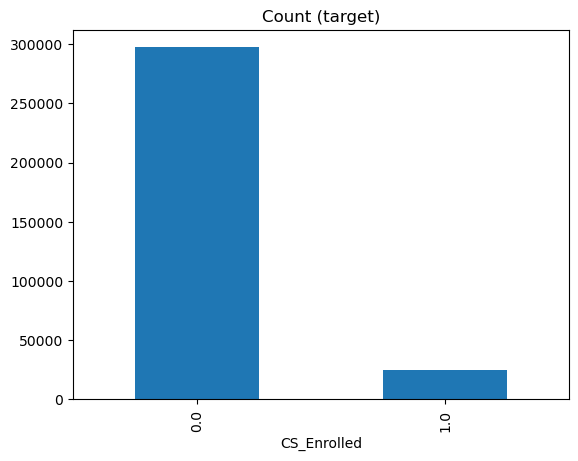

In [64]:
undersample_df = df_for_tree.copy(deep=False)


target_count = undersample_df.CS_Enrolled.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

Random under-sampling:
CS_Enrolled
0.0    24932
1.0    24932
Name: count, dtype: int64


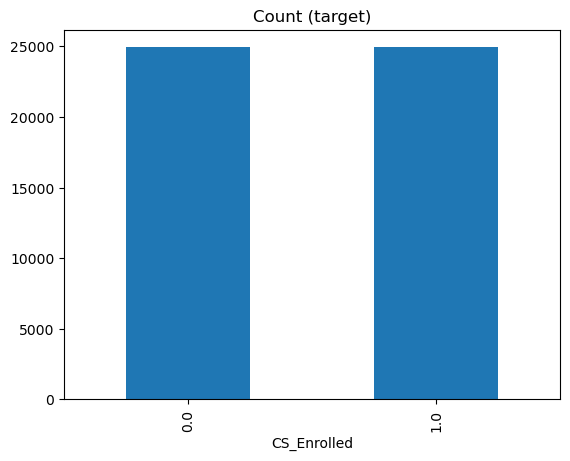

In [65]:
count_class_0, count_class_1 = undersample_df.CS_Enrolled.value_counts()

df_class_0 = undersample_df[undersample_df['CS_Enrolled'] == 0]
df_class_1 = undersample_df[undersample_df['CS_Enrolled'] == 1]

df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.CS_Enrolled.value_counts())

df_test_under.CS_Enrolled.value_counts().plot(kind='bar', title='Count (target)');

In [66]:
df_for_tree = df_test_under.copy(deep=False)

## Preprocessing: Binning

In [67]:
income_bins = [-float('inf'), .20, .40, .60, .80, float('inf')]
income_labels = ['1', '2', '3', '4', '5']

size_bins = [-float('inf'), 100, 300, 900, 1800, float('inf')]
size_labels = ['1', '2', '3', '4', '5']

bipoc_bins = [-float('inf'), .15, .30, .50, .75, float('inf')]
bipoc_labels = ['1', '2', '3', '4', '5']

students_df['IncomeBinned'] = pd.cut(students_df['PercentLowIncome'], bins=income_bins, labels=income_labels)
students_df['SchoolSizeBinned'] = pd.cut(students_df['SchoolSize'], bins=size_bins, labels=size_labels)
students_df['BIPOCBinned'] = pd.cut(students_df['PercentBIPOC'], bins=bipoc_bins, labels=bipoc_labels)

In [68]:
df_for_tree_v2 = df_for_tree.copy(deep=False)

In [69]:
income_bins = [-float('inf'), .20, .40, .60, .80, float('inf')]
income_labels = ['1', '2', '3', '4', '5']

size_bins = [-float('inf'), 100, 300, 900, 1800, float('inf')]
size_labels = ['1', '2', '3', '4', '5']

bipoc_bins = [-float('inf'), .15, .30, .50, .75, float('inf')]
bipoc_labels = ['1', '2', '3', '4', '5']

df_for_tree_v2['IncomeBinned'] = pd.cut(df_for_tree_v2['PercentLowIncome'], bins=income_bins, labels=income_labels)
df_for_tree_v2['SchoolSizeBinned'] = pd.cut(df_for_tree_v2['SchoolSize'], bins=size_bins, labels=size_labels)
df_for_tree_v2['BIPOCBinned'] = pd.cut(df_for_tree_v2['PercentBIPOC'], bins=bipoc_bins, labels=bipoc_labels)

In [70]:
df_for_tree_v2 = df_for_tree_v2.drop(['PercentLowIncome','SchoolSize','PercentBIPOC'], axis=1)

In [71]:
df_for_tree_v2.head()

,CountyPop,Longitude,Latitude,DistrictNumSchools,DistrictSize,DistrictPctLowIncome,DistrictPctBIPOC,DistrictPctCS,PctMale,Male,BIPOC,Asian,TwoOrMore,White,NA,ELL,LowIncome,Disability,CS_Enrolled,IncomeBinned,SchoolSizeBinned,BIPOCBinned
60151,102678,-119.778257,46.730957,2.0,843.0,0.934757,0.983393,0.500000,0.516129,[1],True,False,False,False,False,[0],[1],[0],0.0,5,3,5
241903,844761,-122.115209,48.166505,4.0,2136.0,0.372191,0.242041,0.250000,0.526404,[1],False,False,False,True,False,[0],[1],[0],0.0,2,4,2
90250,2271380,-122.006512,47.191204,1.0,1421.0,0.320197,0.263195,1.000000,0.529909,[0],False,False,False,True,False,[0],[1],[0],0.0,2,4,2
300596,231919,-122.423317,48.784180,6.0,4209.0,0.354003,0.287479,0.666667,0.524540,[1],False,False,False,True,False,[0],[0],[0],0.0,2,4,3
153208,2271380,-122.236725,47.485369,7.0,5325.0,0.546854,0.549484,0.571429,0.482549,[1],False,False,False,True,False,[0],[0],[0],0.0,4,3,4


### Preparing for logistic regression

## Preprocessing: Creating Zones from Longitude and Latitude (on hold)

In [72]:
students_df

,BIPOC,Asian,NA,TwoOrMore,White,nan,CountyPop,County,DistrictCode,SchoolCode,SchoolName,Longitude,Latitude,SchoolSize,C_AllStudents,G_Female,GC_Female,G_Male,GC_Male,G_GenderX,GC_GenderX,R_Native,RC_Native,R_Asian,RC_Asian,R_Black,RC_Black,R_Hisp_Lat,RC_Hisp_Lat,R_HPI,RC_HPI,R_NA,RC_NA,R_TwoOrMore,RC_TwoOrMore,R_White,RC_White,L_ELL,LC_ELL,L_NoELL,LC_NoELL,I_LowIncome,IC_LowIncome,I_NoLowIncome,IC_NoLowIncome,D_Disability,DC_Disability,D_NoDisability,DC_NoDisability,A_9,AC_9,A_10,AC_10,A_11,AC_11,A_12,AC_12,PercentLowIncome,R_BIPOC,PercentBIPOC,DistrictNumSchools,DistrictSize,DistrictLowIncome,DistrictPctLowIncome,DistrictBIPOC,DistrictPctBIPOC,CS_Offered,DistrictCS,DistrictPctCS,PctMale,R_Native_Prob,R_Asian_Prob,R_Black_Prob,R_Hisp_Lat_Prob,R_HPI_Prob,R_NA_Prob,R_TwoOrMore_Prob,R_White_Prob,L_ELL_Prob,L_NoELL_Prob,I_LowIncome_Prob,I_NoLowIncome_Prob,D_Disability_Prob,D_NoDisability_Prob,A_9_Prob,A_10_Prob,A_11_Prob,A_12_Prob,GC_Female_or_X_Prob,GC_Male_Prob,RC_Native_Prob,RC_Asian_Prob,RC_Black_Prob,RC_Hisp_Lat_Prob,RC_HPI_Prob,RC_NA_Prob,RC_TwoOrMore_Prob,RC_White_Prob,LC_ELL_Prob,LC_NoELL_Prob,IC_LowIncome_Prob,IC_NoLowIncome_Prob,DC_Disability_Prob,DC_NoDisability_Prob,AC_9_Prob,AC_10_Prob,AC_11_Prob,AC_12_Prob,C_AllStudents_Prob,Male,race,ELL,LowIncome,Disability,grade,gender_cs_prob,race_cs_prob,ell_cs_prob,low_income_cs_prob,disability_cs_prob,grade_cs_prob,CS_Prob,CS_Enrolled,IncomeBinned,SchoolSizeBinned,BIPOCBinned
0,False,False,False,False,True,False,20820,Adams,1109.0,3075.0,Washtucna Elementary/High School,-118.311231,46.752189,28.0,3.0,9.0,0.0,19.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,24.0,3.0,0.0,0.0,28.0,3.0,17.0,1.0,11.0,2.0,2.0,0.0,26.0,3.0,7.0,0.0,4.0,0.0,6.0,1.0,11.0,2.0,0.607143,4.0,0.142857,1.0,28.0,17.0,0.607143,4.0,0.142857,1.0,1.0,1.00,0.678571,0.00,0.0,0.0,0.071429,0.0,0.0,0.071429,0.857143,0.0,1.0,0.607143,0.392857,0.071429,0.928571,0.25,0.142857,0.214286,0.392857,0.000,0.157895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125000,0.0,0.107143,0.058824,0.181818,0.0,0.115385,0.00,0.0,0.166667,0.181818,0.107143,[1],['White'],[0],[1],[0],[12],0.157895,0.125000,0.107143,0.058824,0.115385,0.181818,0.124344,0.0,4,1,1
1,False,False,False,False,True,False,20820,Adams,1109.0,3075.0,Washtucna Elementary/High School,-118.311231,46.752189,28.0,3.0,9.0,0.0,19.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,24.0,3.0,0.0,0.0,28.0,3.0,17.0,1.0,11.0,2.0,2.0,0.0,26.0,3.0,7.0,0.0,4.0,0.0,6.0,1.0,11.0,2.0,0.607143,4.0,0.142857,1.0,28.0,17.0,0.607143,4.0,0.142857,1.0,1.0,1.00,0.678571,0.00,0.0,0.0,0.071429,0.0,0.0,0.071429,0.857143,0.0,1.0,0.607143,0.392857,0.071429,0.928571,0.25,0.142857,0.214286,0.392857,0.000,0.157895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125000,0.0,0.107143,0.058824,0.181818,0.0,0.115385,0.00,0.0,0.166667,0.181818,0.107143,[1],['White'],[0],[1],[0],[10],0.157895,0.125000,0.107143,0.058824,0.115385,0.000000,0.094041,0.0,4,1,1
2,False,False,False,False,True,False,20820,Adams,1109.0,3075.0,Washtucna Elementary/High School,-118.311231,46.752189,28.0,3.0,9.0,0.0,19.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,24.0,3.0,0.0,0.0,28.0,3.0,17.0,1.0,11.0,2.0,2.0,0.0,26.0,3.0,7.0,0.0,4.0,0.0,6.0,1.0,11.0,2.0,0.607143,4.0,0.142857,1.0,28.0,17.0,0.607143,4.0,0.142857,1.0,1.0,1.00,0.678571,0.00,0.0,0.0,0.071429,0.0,0.0,0.071429,0.857143,0.0,1.0,0.607143,0.392857,0.071429,0.928571,0.25,0.142857,0.214286,0.392857,0.000,0.157895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125000,0.0,0.107143,0.058824,0.181818,0.0,0.115385,0.00,0.0,0.166667,0.181818,0.107143,[1],['White'],[0],[1],[0],[12],0.157895,0.125000,0.107143,0.058824,0.115385,0.181818,0.124344,0.0,4,1,1
3,False,False,False,False,True,False,20820,Adams,1109.0,3075.0,Washtucna Elementary/High School,-118.311231,46.752189,28.0,3.0,9.0,0.0,19.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,24.0,3.0,0.0,0.0,28.0,3.0,17.0,1.0,11.0,2.0,2.0,0.0,26.0,3.0,7.0,0.0,4.0,0.0,6.0,1.0,11.0,2.0,0.607143,4.0,0.142857,

/Users/ebrink/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


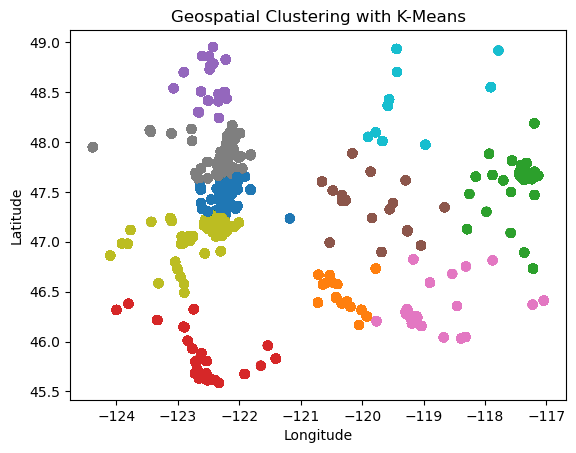

In [73]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
geo_df_scaled = scaler.fit_transform(students_df[['Longitude', 'Latitude']])

from sklearn.cluster import KMeans

# Set the number of zones--starting with five for now
num_clusters = 10 
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
students_df['CountyZone'] = kmeans.fit_predict(geo_df_scaled)

import matplotlib.pyplot as plt

plt.scatter(students_df['Longitude'], students_df['Latitude'], c=students_df['CountyZone'], cmap='tab10')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geospatial Clustering with K-Means')
plt.show()


### Ideas for how to meaningful encode zones:
* Population
* Population density (possible to do this for counties, too?)
* Socioeconomic features similar to percent low income, etc for schools and districts
* For population and population density--how do these interact with county?

## Preprocessing: Normalizing
*K-Nearest Neighbors and K-means Clustering will benefit from normalizing.*

## Preprocessing: Standardizing
*Linear regression, logistic regression and principal component analysis will benefit from standardizing.*

## Preprocessing: Principle Component Analysis (PCA)

## Analysis: Random Forest

In [74]:
X = df_test_under.drop(['CS_Enrolled'], axis = 1)
y = df_test_under['CS_Enrolled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=36)
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier(random_state=42)

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5,
                                 random_state=42)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 8, 'n_estimators': 238}


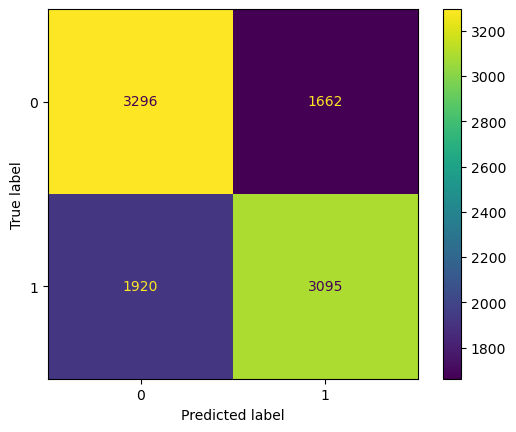

In [75]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [76]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.6408302416524616
Precision: 0.6506201387429051
Recall: 0.617148554336989


In [77]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.63      0.66      0.65      4958
         1.0       0.65      0.62      0.63      5015

    accuracy                           0.64      9973
   macro avg       0.64      0.64      0.64      9973
weighted avg       0.64      0.64      0.64      9973



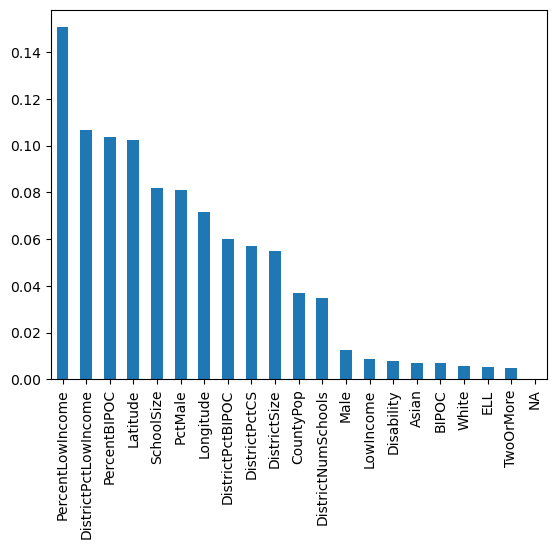

In [78]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

### With binning

In [79]:
X = df_for_tree_v2.drop(['CS_Enrolled'], axis = 1)
y = df_for_tree_v2['CS_Enrolled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=36)
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier(random_state=36)

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5,
                                 random_state=36)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 9, 'n_estimators': 211}


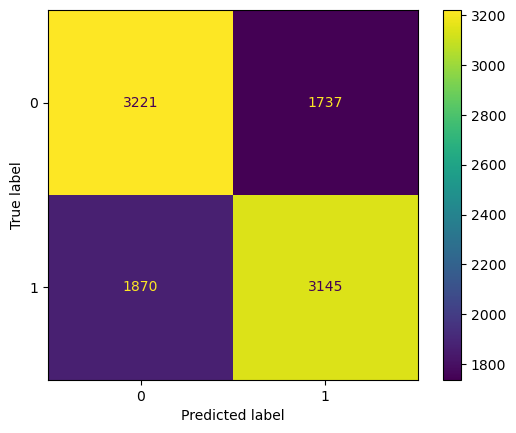

In [80]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [81]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.6383234733781209
Precision: 0.6442031954117166
Recall: 0.6271186440677966


In [82]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.63      0.65      0.64      4958
         1.0       0.64      0.63      0.64      5015

    accuracy                           0.64      9973
   macro avg       0.64      0.64      0.64      9973
weighted avg       0.64      0.64      0.64      9973



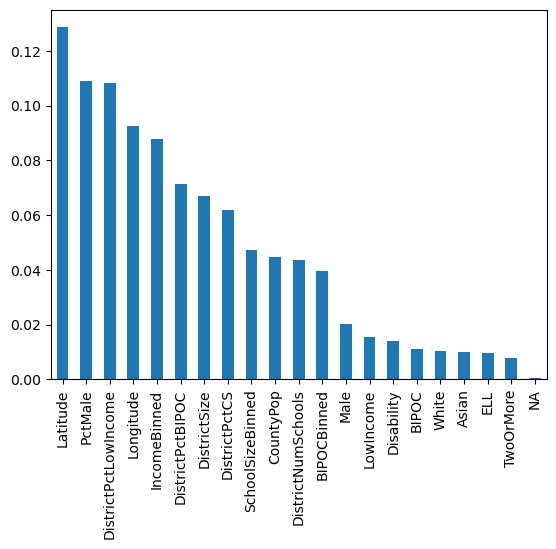

In [83]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

## Analysis: Logistic Regression
### Correlation Heatmap
*To ensure there is not multicollinearity with our independent variables*

In [84]:
log_reg_df = students_df.loc[:, ('BIPOC','Asian','NA','TwoOrMore','White','CountyPop','Longitude','Latitude','Male','ELL','Disability','CS_Enrolled','IncomeBinned','SchoolSizeBinned','BIPOCBinned')]

In [85]:
log_reg_df.head()

,BIPOC,Asian,NA,TwoOrMore,White,CountyPop,Longitude,Latitude,Male,ELL,Disability,CS_Enrolled,IncomeBinned,SchoolSizeBinned,BIPOCBinned
0,False,False,False,False,True,20820,-118.311231,46.752189,[1],[0],[0],0.0,4,1,1
1,False,False,False,False,True,20820,-118.311231,46.752189,[1],[0],[0],0.0,4,1,1
2,False,False,False,False,True,20820,-118.311231,46.752189,[1],[0],[0],0.0,4,1,1
3,False,False,False,False,True,20820,-118.311231,46.752189,[0],[0],[0],0.0,4,1,1
4,False,False,False,False,True,20820,-118.311231,46.752189,[0],[0],[0],0.0,4,1,1


In [86]:
log_reg_df['IncomeBinned'] = log_reg_df['IncomeBinned'].cat.codes
log_reg_df['SchoolSizeBinned'] = log_reg_df['SchoolSizeBinned'].cat.codes
log_reg_df['BIPOCBinned'] = log_reg_df['BIPOCBinned'].cat.codes

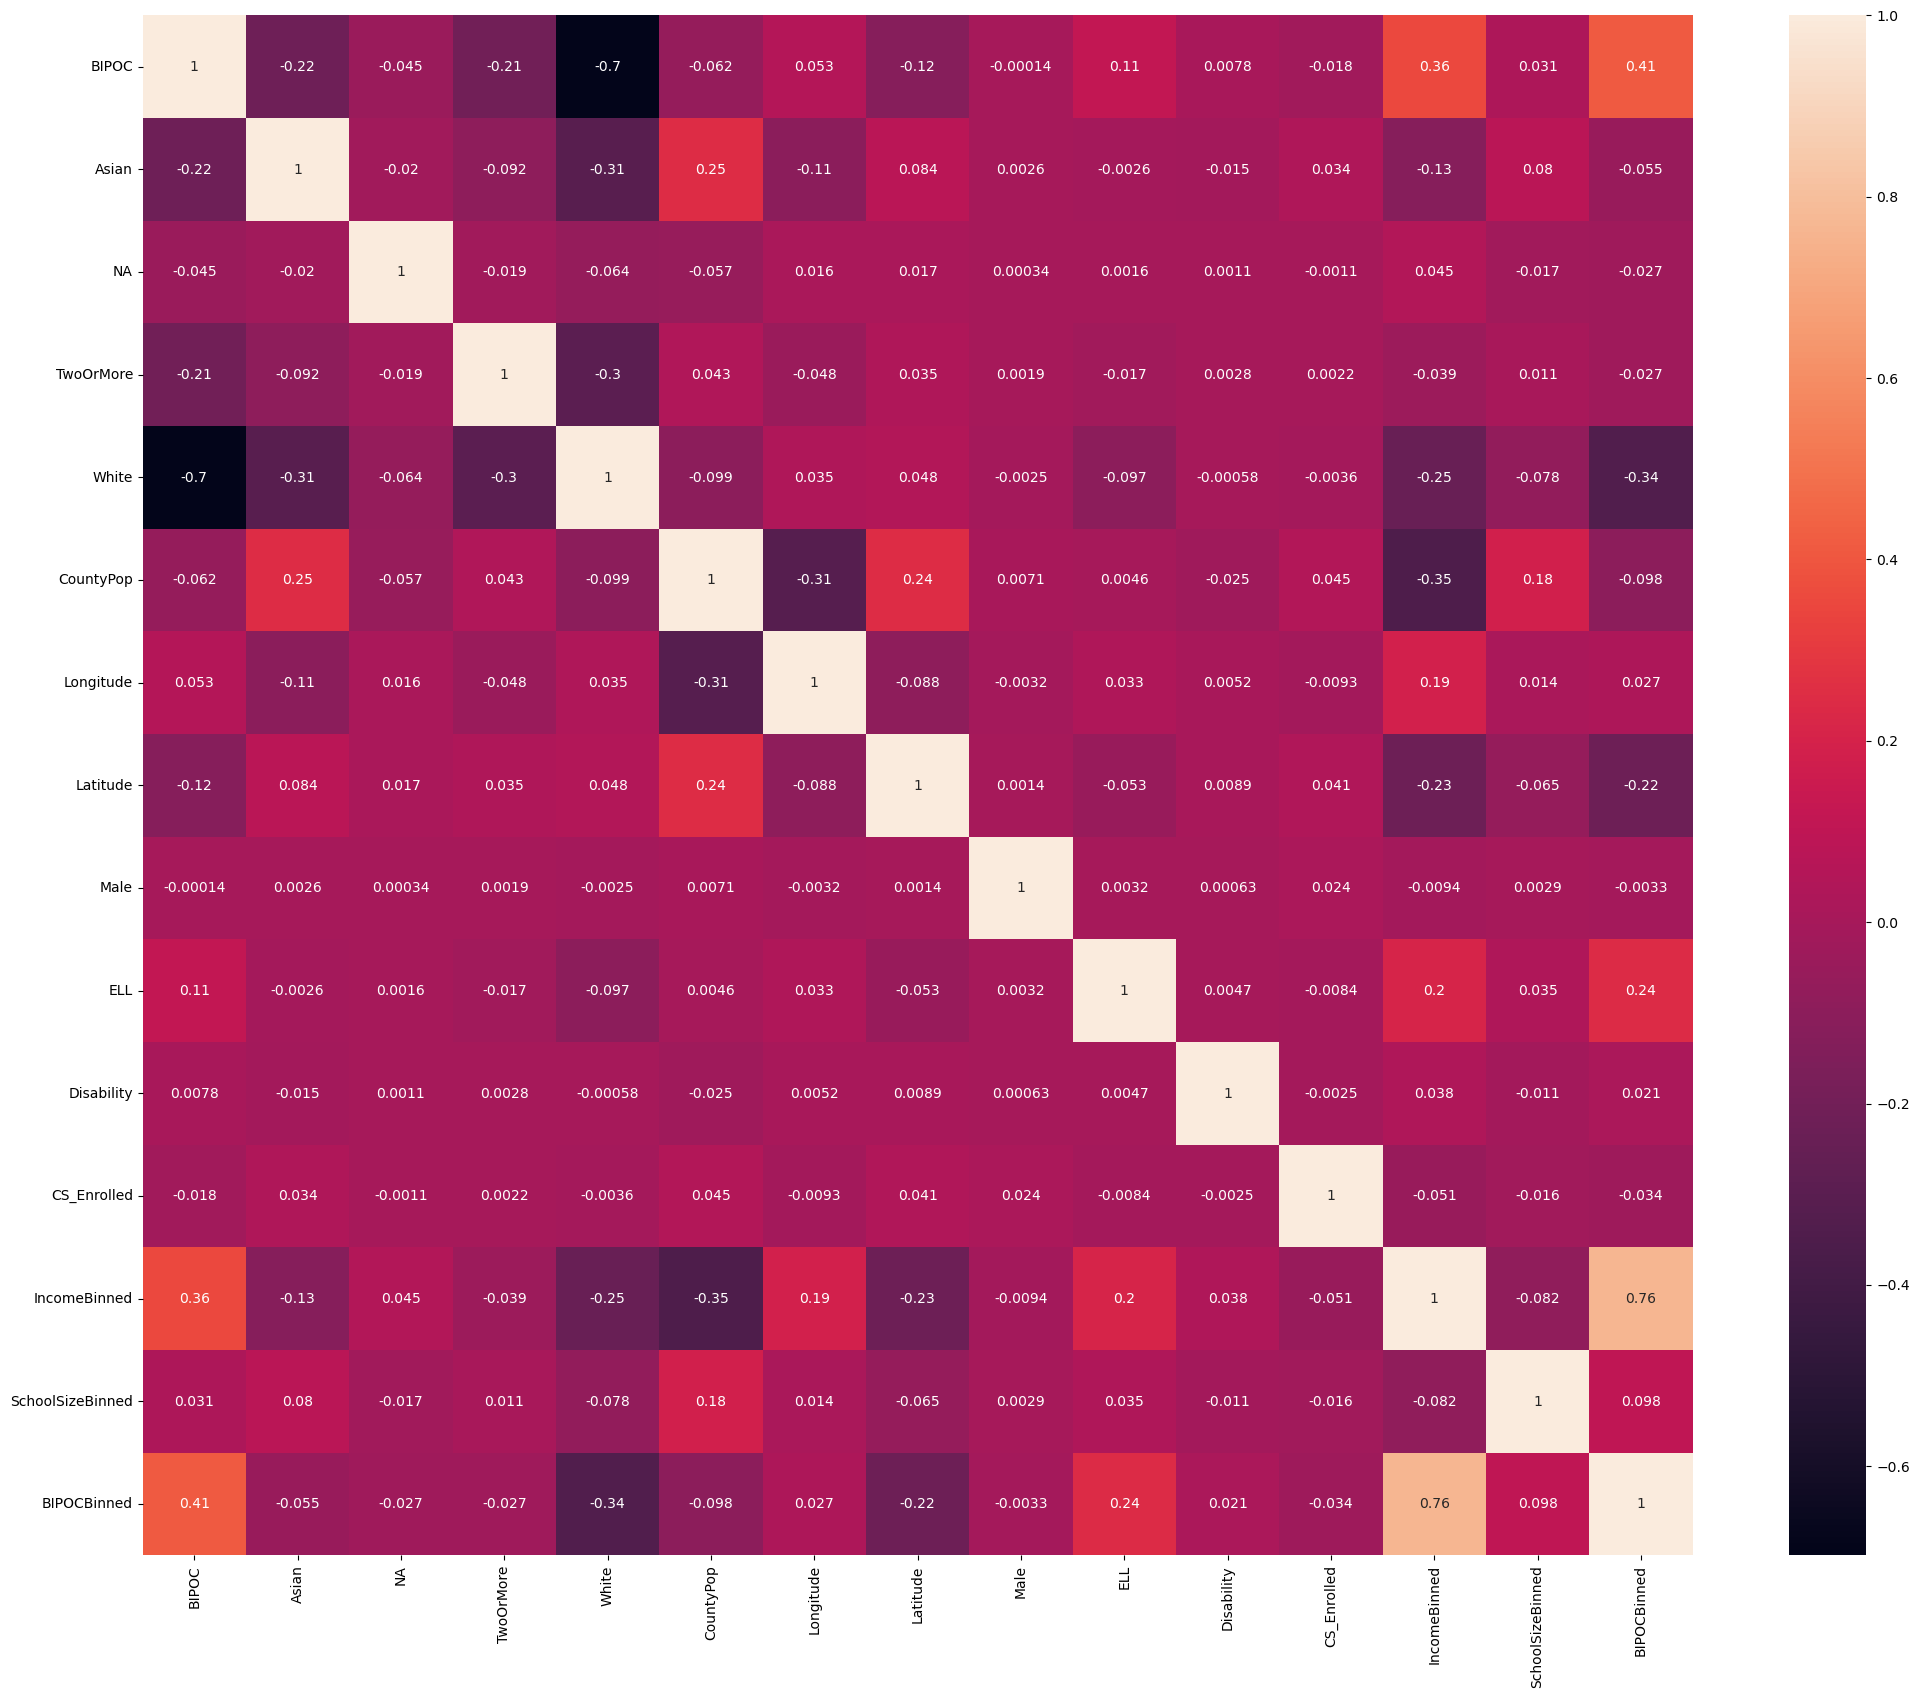

In [87]:
fig = plt.figure(figsize=(25, 20))
sns.heatmap(log_reg_df.corr(), annot=True)
plt.savefig("Heatmap.png")

There does appear to be some possible correlation between IncomeBinned and BIPOCBinned here but we will continue the analysis and come back to this potential issue.

In [99]:
X = log_reg_df.drop(['CS_Enrolled'], axis = 1)
y = log_reg_df['CS_Enrolled']

In [100]:
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(random_state=0, class_weight='balanced')
log_model = logreg.fit(X_train, y_train)

In [102]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.55


In [103]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[48440 40755]
 [ 3090  4333]]


### Undersampling

## Analysis: Mutual Information

## Analysis: Ensemble Learning
*Combining the above methods of analysis for a more accurate model*